In [1]:
from helper import *  
import warnings
warnings.filterwarnings('ignore')
import pandas as pd #a library to make the data more structured

In [2]:
df = pd.read_csv("data/detik-clean-data.csv") #create data frame
text = df['summary']
text_list =  [i.split() for i in text]
print(len(text_list))
print(text_list)

180
[['asti', 'gustiasih', 'menjadikan', 'keterbatasan', 'fisik', 'hambatan', 'berkarya', 'pegiat', 'daur', 'ulang', 'sampah', 'karyanya', 'tangan', 'pesohor'], ['arthur', 'leigh', 'welohr', 'wna', 'amerika', 'serikat', 'tega', 'menusuk', 'mati', 'mertuanya', 'kantor', 'imigrasi'], ['heboh', 'video', 'bullying', 'siswa', 'smp', 'cilacap', 'jateng', 'hangat', 'diperbincangkan', 'beredar', 'foto', 'siswa', 'smp', 'menginjak', 'kepala', 'temannya'], ['warga', 'dihebohkan', 'beredarnya', 'foto', 'siswa', 'smp', 'menginjak', 'kepala', 'temannya', 'sekolah', 'angkat', 'bicara', 'terkait'], ['pelajar', 'bandung', 'korban', 'sodomi', 'pria', 'percakapan', 'aplikasi', 'walla', 'polisi', 'kominfo', 'memblokir', 'aplikasi'], ['polisi', 'menggerebek', 'arena', 'permainan', 'adu', 'kemiri', 'muncang', 'area', 'pemakaman', 'digerebek', 'pejudi', 'kocar', 'kacir'], ['buah', 'kotak', 'amal', 'apotek', 'padayungan', 'kota', 'digondol', 'maling', 'aksi', 'terduga', 'pelaku', 'pencurian', 'terekam', 'kam

In [3]:
import gensim
#Create Bigram & Trigram Models 
from gensim.models import Phrases
# Add bigrams and trigrams to docs,minimum count 10 means only that appear 10 times or more.
bigram = Phrases(text_list, min_count=10)
trigram = Phrases(bigram[text_list])
for idx in range(len(text_list)):
    for token in bigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)
    for token in trigram[text_list[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            text_list[idx].append(token)

In [4]:
from gensim import corpora, models
# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(text_list)
dictionary.filter_extremes(no_below=5, no_above=0.2) 
#no_below (int, optional) – Keep tokens which are contained in at least no_below documents.
#no_above (float, optional) – Keep tokens which are contained in no more than no_above documents (fraction of total corpus size, not an absolute number).
print(dictionary)

Dictionary<64 unique tokens: ['kepala', 'smp', 'warga', 'bandung', 'polisi']...>


In [5]:
#https://radimrehurek.com/gensim/tut1.html 
#build corpus
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in text_list]
#The function doc2bow converts document (a list of words) into the bag-of-words format
'''The function doc2bow() simply counts the number of occurrences of each distinct word, 
converts the word to its integer word id and returns the result as a sparse vector. 
The sparse vector [(0, 1), (1, 1)] therefore reads: in the document “Human computer interaction”, 
the words computer (id 0) and human (id 1) appear once; 
the other ten dictionary words appear (implicitly) zero times.'''
print(len(doc_term_matrix))
print(doc_term_matrix[100])
tfidf = models.TfidfModel(doc_term_matrix) #build TF-IDF model
corpus_tfidf = tfidf[doc_term_matrix]

180
[]


In [6]:
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
from numpy import array
#function to compute coherence values
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, iterations=100)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

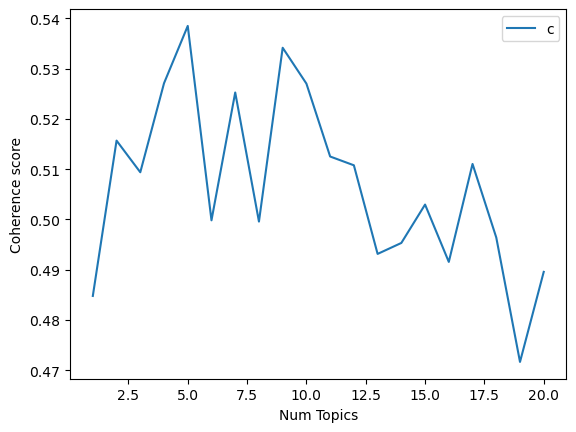

In [7]:
start=1
limit=21
step=1
model_list, coherence_values = compute_coherence_values(dictionary, corpus=corpus_tfidf, 
                                                        texts=text_list, start=start, limit=limit, step=step)
#show graphs
import matplotlib.pyplot as plt
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [8]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 6))

Num Topics = 1  has Coherence Value of 0.484782
Num Topics = 2  has Coherence Value of 0.515675
Num Topics = 3  has Coherence Value of 0.509379
Num Topics = 4  has Coherence Value of 0.527084
Num Topics = 5  has Coherence Value of 0.538482
Num Topics = 6  has Coherence Value of 0.499823
Num Topics = 7  has Coherence Value of 0.525246
Num Topics = 8  has Coherence Value of 0.499575
Num Topics = 9  has Coherence Value of 0.534139
Num Topics = 10  has Coherence Value of 0.527009
Num Topics = 11  has Coherence Value of 0.512513
Num Topics = 12  has Coherence Value of 0.510765
Num Topics = 13  has Coherence Value of 0.493141
Num Topics = 14  has Coherence Value of 0.495322
Num Topics = 15  has Coherence Value of 0.502956
Num Topics = 16  has Coherence Value of 0.491553
Num Topics = 17  has Coherence Value of 0.511031
Num Topics = 18  has Coherence Value of 0.496405
Num Topics = 19  has Coherence Value of 0.471662
Num Topics = 20  has Coherence Value of 0.489572


In [16]:
model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=5) #num topic menyesuaikan hasil dari coherence value paling tinggi
for idx, topic in model.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic)) 

Topic: 0 Word: 0.087*"pria" + 0.065*"air" + 0.054*"daerah" + 0.050*"pelaku" + 0.042*"wilayah" + 0.034*"warga" + 0.031*"kecamatan" + 0.031*"konser" + 0.031*"smp" + 0.030*"gegara"
Topic: 1 Word: 0.063*"jalan" + 0.055*"perlombaan" + 0.047*"warga" + 0.045*"kemerdekaan" + 0.038*"smp" + 0.038*"kepala" + 0.033*"daerah" + 0.032*"masjid" + 0.032*"salah" + 0.032*"pemuda"
Topic: 2 Word: 0.067*"ri" + 0.061*"warga" + 0.059*"mengungkap" + 0.056*"aksi" + 0.049*"konser" + 0.039*"polisi" + 0.039*"salah" + 0.036*"pelaku" + 0.035*"bandung" + 0.035*"lomba"
Topic: 3 Word: 0.078*"jawa_barat" + 0.057*"polisi" + 0.040*"jawa" + 0.039*"barat" + 0.038*"ditangkap" + 0.035*"warga" + 0.033*"indonesia" + 0.032*"dede" + 0.030*"kampung_gunung" + 0.029*"kampung"
Topic: 4 Word: 0.073*"jabar" + 0.065*"kabupaten" + 0.055*"acara" + 0.054*"peristiwa" + 0.045*"jawa_barat" + 0.038*"tewas" + 0.036*"beragam_peristiwa" + 0.034*"beragam" + 0.025*"kamil" + 0.025*"ridwan"


In [17]:
import pandas as pd
top_words_per_topic = []
for t in range(model.num_topics):
    top_words_per_topic.extend([(t, ) + x for x in model.show_topic(t, topn = 10)])
#pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word', 'P']).to_csv("top_words.csv")
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P']).to_csv("top_words2.csv")
print(df)

None


In [18]:
print("Corpus Length:", len(corpus_tfidf))

Corpus Length: 180


In [19]:
df = pd.DataFrame(top_words_per_topic, columns=['Topic', 'Word','P'])

In [20]:
df

,Topic,Word,P
0,0,pria,0.087313
1,0,air,0.064561
2,0,daerah,0.053840
3,0,pelaku,0.049822
4,0,wilayah,0.042319
5,0,warga,0.033839
6,0,kecamatan,0.031317
7,0,konser,0.031162
8,0,smp,0.030769
9,0,gegara,0.029702


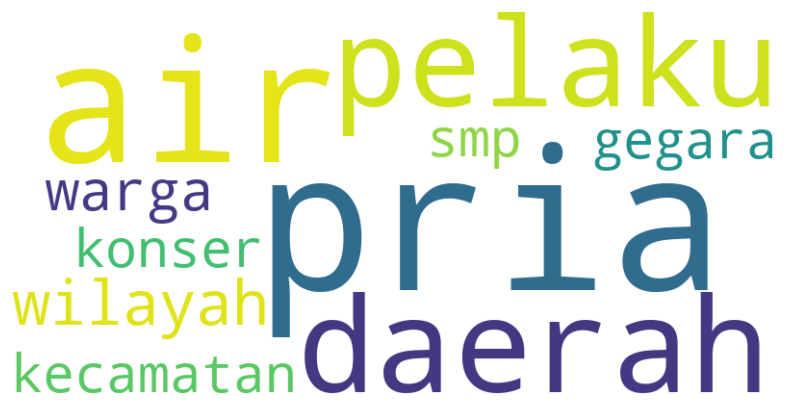

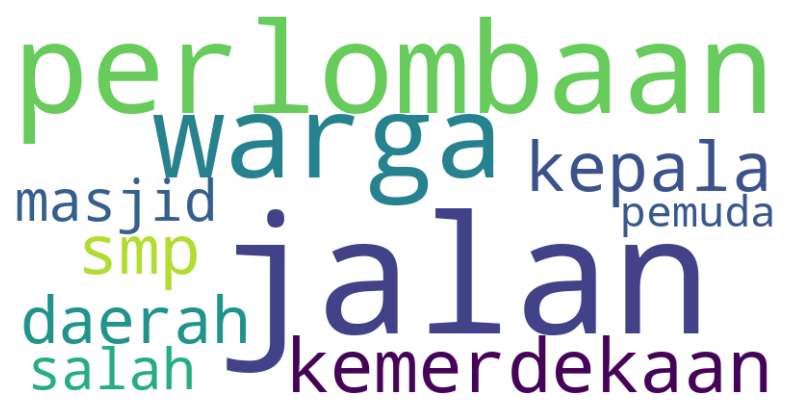

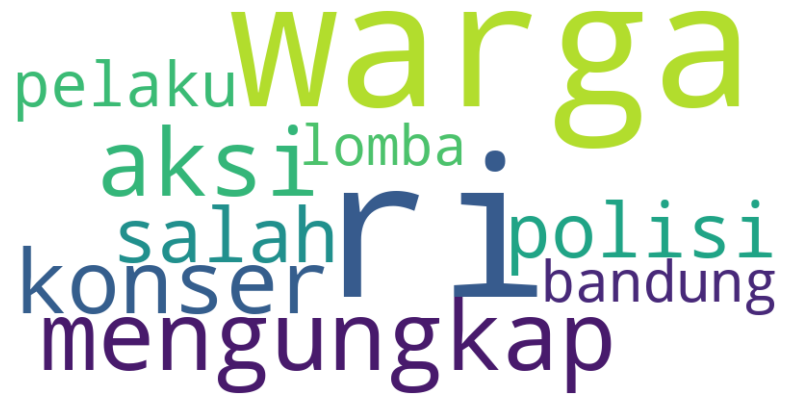

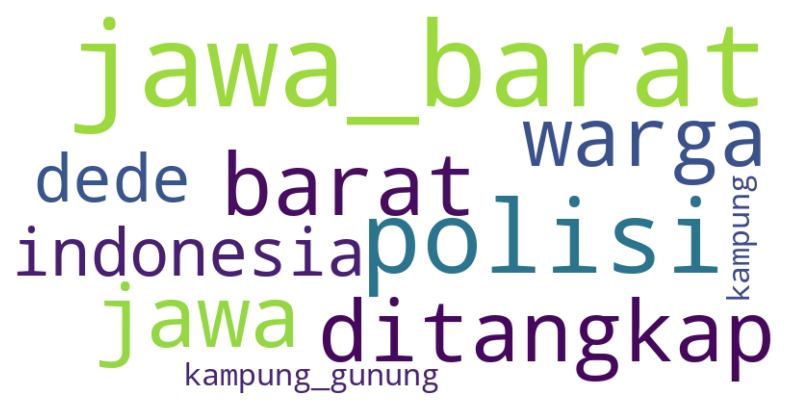

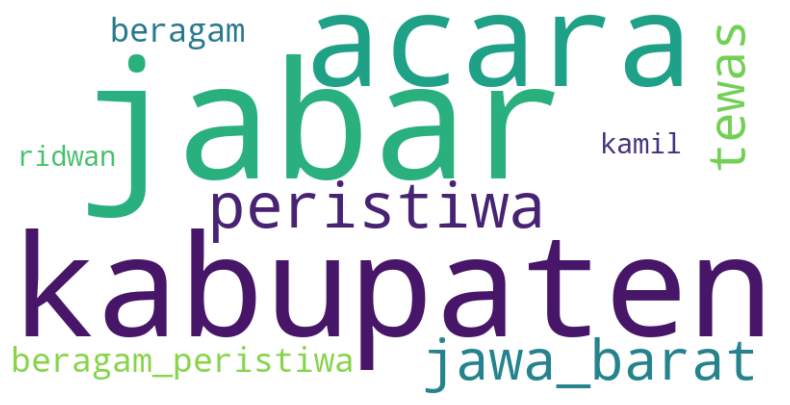

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming you have already loaded the top words data into a DataFrame 'df'

# Create a function to generate a word cloud for a specific topic
def generate_word_cloud(topic_words):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Generate word clouds for each topic
for topic_id in range(model.num_topics):
    topic_words = dict(df[df['Topic'] == topic_id].set_index('Word')['P'])
    generate_word_cloud(topic_words)
